# Exercise - 1 

# 11) Read and write a summary of the metadata .

#### SUMMARY OF METADATA

this is a transnational dataset that contains all the transactions occuring between 1-12-2010 and 9-12-2011 for a UK based and registered online retailer.
many customers of the company are wholesalers
ATTRIBUTES :
  - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
  - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
  - Description: Product (item) name. Nominal
  - Quantity: The quantities of each product (item) per transaction. Numeric.
  - InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
  - UnitPrice: Unit price. Numeric, Product price per unit in sterling.
  - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
  - Country: Country name. Nominal, the name of the country where each customer resides.

In [7]:
import pandas as pd

In [8]:
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
df['Price'] = df['Quantity'] * df['UnitPrice']

In [10]:
import datetime as dt
PRESENT = dt.datetime(2011,12,9)
RFM = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT.month - date.max().month)+(PRESENT.year - date.max().year) * 12 ,
                                    'InvoiceNo': lambda num: len(num),
                                    'Price': lambda price: price.sum()})
RFM

,InvoiceDate,InvoiceNo,Price
CustomerID,,,
12346.0,11,2,0.00
12347.0,0,182,4310.00
12348.0,3,31,1797.24
12349.0,1,73,1757.55
12350.0,10,17,334.40
...,...,...,...
18280.0,9,10,180.60
18281.0,6,7,80.82
18282.0,0,13,176.60


In [11]:
RFM.columns = ['Recency','Frequency','Monetary']

In [12]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,11,2,0.00
12347.0,0,182,4310.00
12348.0,3,31,1797.24
12349.0,1,73,1757.55
12350.0,10,17,334.40
...,...,...,...
18280.0,9,10,180.60
18281.0,6,7,80.82
18282.0,0,13,176.60


#### 14) Use the elbow method to identify how many customer segments exist, using the RFM values for each customer

In [13]:
q1= RFM.Recency.quantile(0.1)
q3=RFM.Recency.quantile(0.90)
iqr = q3-q1
RFM = RFM[(RFM.Recency>=q1-1.5*iqr)&(RFM.Recency<=q3+1.5*iqr)]

In [14]:
q1= RFM.Monetary.quantile(0.1)
q3=RFM.Monetary.quantile(0.90)
iqr = q3-q1
RFM = RFM[(RFM.Monetary>=q1-1.5*iqr)&(RFM.Monetary<=q3+1.5*iqr)]

In [15]:
q1= RFM.Frequency.quantile(0.1)
q3=RFM.Frequency.quantile(0.90)
iqr = q3-q1
RFM = RFM[(RFM.Frequency>=q1-1.5*iqr)&(RFM.Frequency<=q3+1.5*iqr)]

In [16]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,11,2,0.00
12347.0,0,182,4310.00
12348.0,3,31,1797.24
12349.0,1,73,1757.55
12350.0,10,17,334.40
...,...,...,...
18278.0,3,9,173.90
18280.0,9,10,180.60
18281.0,6,7,80.82


In [21]:
from sklearn.cluster import KMeans

In [22]:
scores = list()
for i in range(1,8):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(scaled)
    scores.append(kmeans.inertia_)

[]

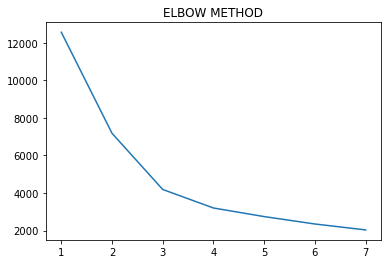

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,8),scores)
plt.title("ELBOW METHOD")
plt.xticks(range(1,8))
plt.plot()

#### 15) Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

In [29]:
kmeans = KMeans(n_clusters=3,max_iter=40).fit(RFM)
cluster_values = kmeans.labels_

In [30]:
RFM['Cluster'] = cluster_values
RFM

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,11,2,0.00,0
12347.0,0,182,4310.00,1
12348.0,3,31,1797.24,2
12349.0,1,73,1757.55,2
12350.0,10,17,334.40,0
...,...,...,...,...
18278.0,3,9,173.90,0
18280.0,9,10,180.60,0
18281.0,6,7,80.82,0


#### 16) Plot the clusters in a scatter plot and mark each segment differently using lmplot.

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

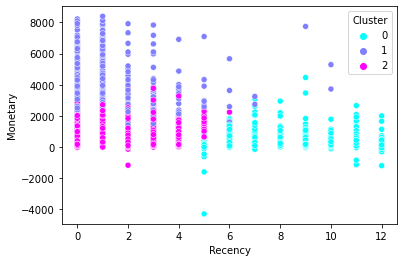

In [64]:
import seaborn as sns
sns.scatterplot(data=RFM,x=RFM.Recency,y=RFM.Monetary,hue=RFM.Cluster,palette='cool')

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

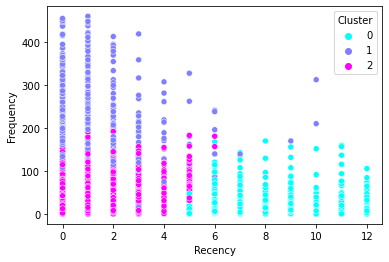

In [61]:
sns.scatterplot(x=RFM.Recency,y=RFM.Frequency,hue=RFM.Cluster,palette='cool')

<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>

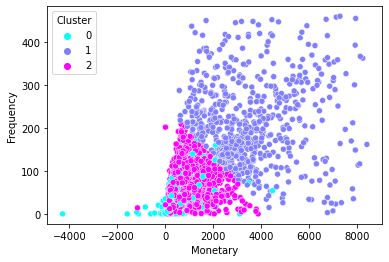

In [67]:
sns.scatterplot(x=RFM.Monetary,y=RFM.Frequency,hue=RFM.Cluster,palette='cool')

#### 17) Print the cluster centers of each customer segment and explain them intuitively.

In [31]:
cluster_center = kmeans.cluster_centers_

In [33]:
print(cluster_center)

[[3.96368353e+00 3.94208820e+01 4.84572592e+02 6.84176394e-01]
 [1.05306122e+00 2.17714286e+02 5.22046914e+03 9.91836735e-01]
 [1.65000000e+00 1.31004651e+02 2.18629154e+03 5.31395349e-01]]


#### 18) Create the customer segments with Agglomerative algorithm by using number of clusters is suggested by elbow method

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
agg_clustering =AgglomerativeClustering(n_clusters=3).fit(RFM)

#### 19) Visualize the clusters using the dendrogram

[]

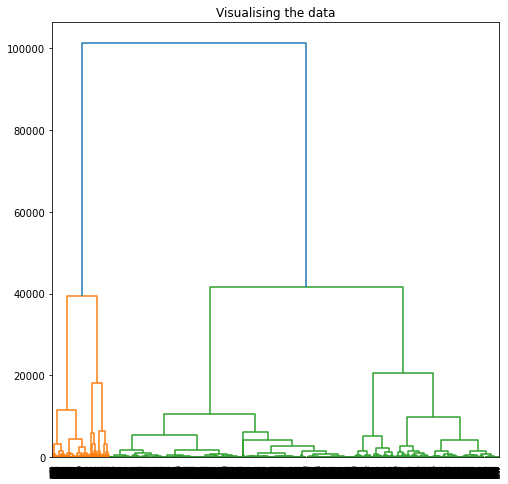

In [36]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(RFM, method ='ward')))
plt.plot()